In [20]:
import gcsfs
import joblib
import pandas as pd
import sys

In [25]:
! pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 3.1 MB/s eta 0:00:000:00:01m eta 0:00:01
You should consider upgrading via the '/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/bin/python3.10 -m pip install --upgrade pip' command.


In [21]:
sys.path.append("../training/src")

In [26]:
import main

In [14]:
! pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 15.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 15.4 MB/s eta 0:00:00m eta 0:00:010:00:01
You should consider upgrading via the '/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/bin/python3.10 -m pip install --upgrade pip' command.


In [12]:
def load_joblib(model_path):
    fs = gcsfs.GCSFileSystem()
    with fs.open(f'{model_path}') as f:
        return joblib.load(f)

In [15]:
lrc_model = load_joblib(model_path = "gs://churn_data_363519/churn-prediction-pipeline-20230402193147/lrc_model.joblib")

/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [43]:
input_df = pd.read_csv("../data/bank_data.csv")

In [44]:


# columns used for X
KEEP_COLS = [
    'Customer_Age',
    'Dependent_count',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt',
    'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio',
]

In [45]:
input_df.shape

(10127, 22)

In [29]:
# encoded_df = main.encoder_helper(input_df, category_list, 'Churn')
# print(encoded_df.head(5))

# data split
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST, X, y = main.perform_feature_engineering(
    input_df, KEEP_COLS
)

   Unnamed: 0  CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
0           0  768805383  Existing Customer            45      M   
1           1  818770008  Existing Customer            49      F   
2           2  713982108  Existing Customer            51      M   
3           3  769911858  Existing Customer            40      F   
4           4  709106358  Existing Customer            40      M   

   Dependent_count Education_Level Marital_Status Income_Category  \
0                3     High School        Married     $60K - $80K   
1                5        Graduate         Single  Less than $40K   
2                3        Graduate        Married    $80K - $120K   
3                4     High School        Unknown  Less than $40K   
4                3      Uneducated        Married     $60K - $80K   

  Card_Category  ...  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0          Blue  ...             1144              42                1.625   
1          Blue  ...

/Users/denisebby/Desktop/dev_apps/kubeflow_churn/deployment/../training/src/encode.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[cat + '_' + response] = df[cat].map(df.groupby(cat).mean()[response])
/Users/denisebby/Desktop/dev_apps/kubeflow_churn/deployment/../training/src/encode.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[cat + '_' + response] = df[cat].map(df.groupby(cat).mean()[response])
/Users/denisebby/Desktop/dev_apps/kubeflow_churn/deployment/../training/src/encode.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future versi

In [41]:
X_TEST

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
3781,48,3,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,0.173572,0.159381,0.169414,0.171862,0.160979
2922,59,1,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,0.146152,0.159381,0.169414,0.171862,0.160979
5070,37,2,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,0.173572,0.155691,0.161765,0.171862,0.160979
7246,47,3,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,0.146152,0.210643,0.161765,0.151397,0.160979
623,42,3,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,0.146152,0.168532,0.169414,0.157655,0.160979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,49,4,30,5,3,3,1579.0,900,679.0,0.592,4354,70,0.707,0.570,0.146152,0.152012,0.169414,0.134807,0.160979
9535,39,1,36,1,3,2,34516.0,1662,32854.0,0.751,13578,105,0.615,0.048,0.146152,0.155691,0.169414,0.134807,0.181034
4638,56,2,48,4,3,3,4480.0,2465,2015.0,0.772,3331,74,0.682,0.550,0.146152,0.210643,0.169414,0.157655,0.160979
1166,38,2,36,6,3,4,2717.0,1591,1126.0,1.596,2064,33,1.062,0.586,0.173572,0.155691,0.151269,0.171862,0.160979


In [32]:
preds = lrc_model.predict(X_TEST)

/Users/denisebby/.pyenv/versions/3.10.3/envs/pl_dev_1/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
X_TEST.shape[0]

3039

In [33]:
preds.shape[0]

3039

In [36]:
import matplotlib.pyplot as plt

(array([2726.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         313.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

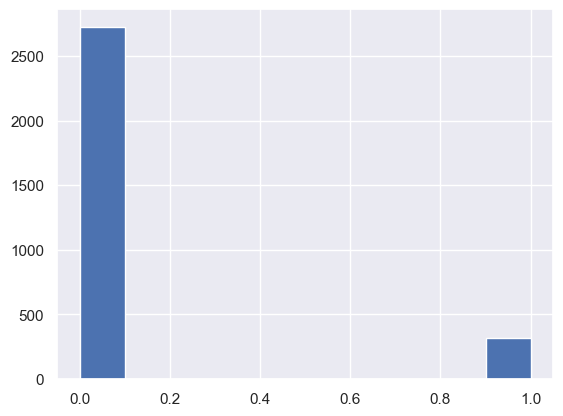

In [38]:
plt.hist(preds)